# Exploratory Data Analysis

In [6]:
#import library required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier

In [10]:
df = pd.read_csv("Titanic.csv", index_col="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
#import data and drop data
df.drop(columns = ["Name", "Ticket", "Cabin"], inplace = True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [13]:
#target
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

the insight obtained from the data the number of Survived is 342 and those who are not 549

C:\Users\Hamzah\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hamzah\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


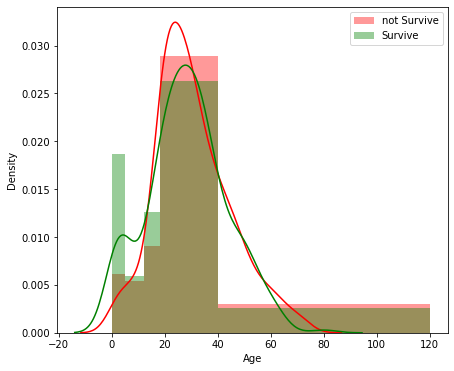

In [14]:
#numeric vs target
plt.figure(figsize=(7, 6))
sns.distplot(df.Age[df.Survived == 0], bins= [0, 5, 12, 18, 40, 120], color="r", label = "not Survive")
sns.distplot(df.Age[df.Survived == 1], bins= [0, 5, 12, 18, 40, 120], color="g", label = "Survive")
plt.legend()

The insight obtained from the data is that infants are more likely to survive and adults (20 - 40) are more likely to be unsafe. you could say that rescue is prioritized for children

C:\Users\Hamzah\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hamzah\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


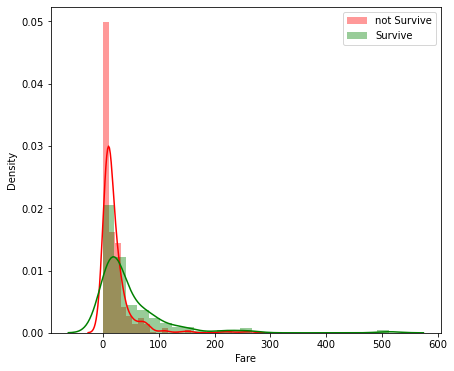

In [15]:
plt.figure(figsize=(7, 6))
sns.distplot(df.Fare[df.Survived == 0], bins= 25, color="r", label = "not Survive")
sns.distplot(df.Fare[df.Survived == 1], bins= 25, color="g", label = "Survive")
plt.legend()

The insight that comes from the data is that 25 dollars are more likely to not survive, and those over 25 dollars are more likely to survive. you could say the facilities obtained are different

C:\Users\Hamzah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hamzah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hamzah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hamzah\anaconda3\li

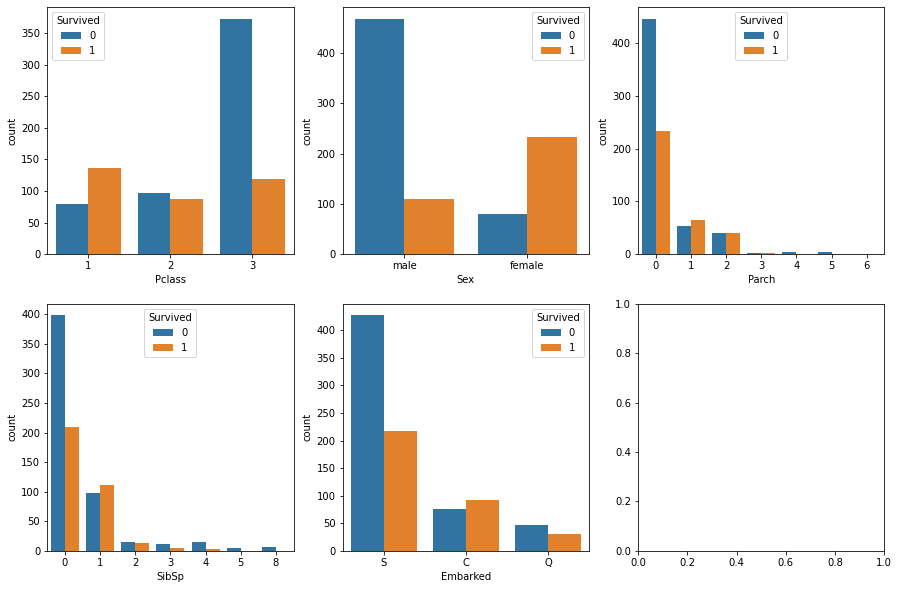

In [19]:
#catagoric / ordinal vs target
cat_var = ["Pclass", "Sex", "Parch", "SibSp", "Embarked"]

fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for cat, ax in zip(cat_var, axes.flatten()):
    sns.countplot(cat, data=df, hue="Survived", ax=ax)

The insights obtained from the data are:

Class P: the class with the best quality (1) has higher security than the simple class (3). because it is possible that the facilities received are different from the level

Sex: men are less safe than women because men may put women's safety first

Parch: can be seen if not bringing children. increased self-safety

SibSp: being alone tends to be unsafe and in pairs increases safety

Embarked: city departures (S) tend to be unsafe and their safety is higher than that of cities (c, and d). it is possible that most of the departures come from class (3)